In [1]:
import keras
from keras.layers import SimpleRNN

In [2]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

### SimpleRNN의 두가지 방식

In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=False))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


### 모델 구축

In [5]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))

In [6]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 326,240
Trainable params: 326,240
Non-trainable params: 0
_________________________________________________________________


In [8]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data( num_words=max_features)

In [9]:
input_train.shape, y_train.shape, input_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [10]:
# 문장에서 maxlen 이후의 있는 단어들을 pad_sequences()함수로 잘라낸다.
# 문장 길이가 maxlen보다 작으면 부족한 부분을 0으로 채웁니다. 
print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [11]:
input_train[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [12]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32)) # max_features = 10000
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [13]:
%%time

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 10s 58ms/step - loss: 0.5989 - acc: 0.6729 - val_loss: 0.4398 - val_acc: 0.8280
Epoch 2/10
157/157 [==============================] - 9s 57ms/step - loss: 0.3915 - acc: 0.8368 - val_loss: 0.3640 - val_acc: 0.8484
Epoch 3/10
157/157 [==============================] - 9s 58ms/step - loss: 0.2873 - acc: 0.8861 - val_loss: 0.4329 - val_acc: 0.7950
Epoch 4/10
157/157 [==============================] - 9s 58ms/step - loss: 0.2244 - acc: 0.9161 - val_loss: 0.5975 - val_acc: 0.8058
Epoch 5/10
157/157 [==============================] - 9s 57ms/step - loss: 0.1752 - acc: 0.9349 - val_loss: 0.4279 - val_acc: 0.8310
Epoch 6/10
157/157 [==============================] - 9s 56ms/step - loss: 0.1192 - acc: 0.9588 - val_loss: 0.7452 - val_acc: 0.7754
Epoch 7/10
157/157 [==============================] - 9s 57ms/step - loss: 0.0929 - acc: 0.9697 - val_loss: 0.4837 - val_acc: 0.8388
Epoch 8/10
157/157 [==============================] - 9s 56ms/step -

In [15]:
import matplotlib.pyplot as plt

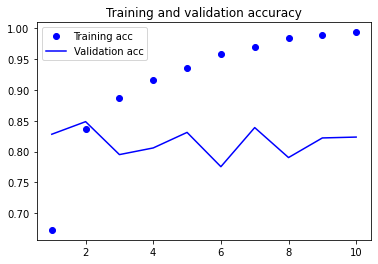

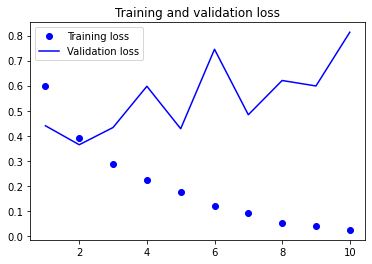

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
